<a href="https://colab.research.google.com/github/Leandro-Braga/Estudo_de_Caso/blob/main/Atividade_Leandro_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tema: Redes Neurais**

O Dataset Fashion-MNIST é um conjunto de dados de imagens de artigos, consistindo em um conjunto de treinamento de 60.000 exemplos e um conjunto de teste de 10.000 exemplos. Cada exemplo é uma imagem de 28x28, associada a um rótulo de 10 classes. Fashion-MNIST serve como um substituto direto para o conjunto de dados MNIST original para benchmarking de algoritmos de aprendizado de máquina. Ele compartilha o mesmo tamanho de imagem e estrutura das divisões de treinamento e teste.

Cada imagem tem 28 pixels de altura e 28 pixels de largura, para um total de 784 pixels no total.

Cada pixel tem um único valor de pixel associado a ele, indicando a claridade ou escuridão daquele pixel, com números mais altos significando mais escuro. Este valor de pixel é um número inteiro entre 0 e 255.

A primeira coluna é composta pelos rótulos das classes (veja acima), e representa a peça de vestuário.

O restante contém os valores de pixel da imagem associada.

### Classificador de imagens usando rede neural

In [116]:
# importando as bibliotecas necessárias

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
import pydot

In [117]:
# Verificando a versão do KERAS 
keras.__version__

'2.7.0'

In [118]:
# Verificando a versão do Tensoflow 
tf.__version__

'2.7.0'

In [119]:
# Carregando a base de dados

fashion_mnist = keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,y_test) = fashion_mnist.load_data()

A dimensão do treinamento original, conjunto de teste são os seguintes:

In [120]:
print("x_train = ",x_train_full.shape,"y_train = ",y_train_full.shape,"x_test = ",x_test.shape,"y_test = ",y_test.shape)

x_train =  (60000, 28, 28) y_train =  (60000,) x_test =  (10000, 28, 28) y_test =  (10000,)


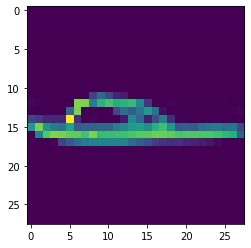

In [121]:
plt.imshow(x_train_full[30])

In [122]:
y_train_full[30]

5

Existem 10 classes diferentes de imagens, segue:

In [123]:
class_names = ["T-shirt/Top","Trouser","Pullover","Dress","Coat",
              "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [124]:
class_names[y_train_full[30]]

'Sandal'

In [125]:
x_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

### NORMALIZAÇÃO DE DADOS

In [126]:
x_train_n = x_train_full/255.
x_test_n = x_test/255.

Visualização dos dados

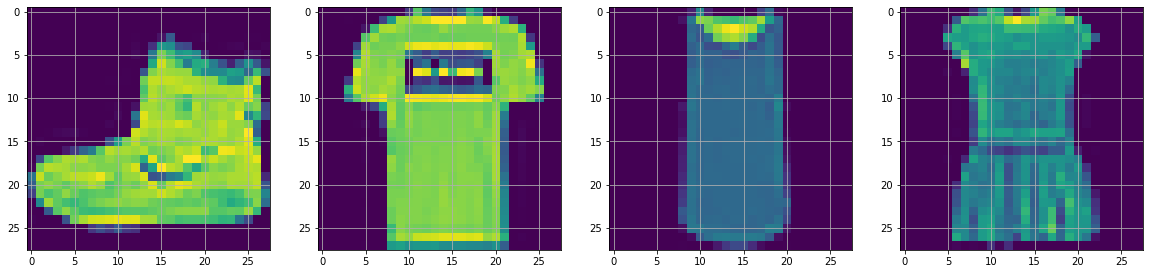

In [127]:
fig, axs = plt.subplots(1,4, figsize=(20, 10))
for ax, i in zip(axs, range(6)):
    ax.imshow(x_train_n[i])
    ax.grid(True)

plt.show()

Dividindo os dados em conjuntos de treinamento/validação/teste


*   Dados de treinamento = usado para treinar o modelo
*   Dados de validação = usado para ajustar os hiperparâmetros e avaliar o modelo
*   Dados de teste = usado para testar o modelo após o modelo ter passado pela verificação inicial do conjunto de validação



In [128]:
x_valid, x_train = x_train_n[:5000],x_train_n[5000:]
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]
x_test = x_test_n

In [129]:
unique, counts = np.unique(x_test, return_counts=True)
df = pd.Series(zip(unique, counts))
print(df)
# Todos os tipos de roupas que têm a mesma contagem presente no conjunto de dados

0                     (0.0, 3919183)
1       (0.00392156862745098, 79560)
2       (0.00784313725490196, 48331)
3      (0.011764705882352941, 32159)
4       (0.01568627450980392, 22181)
                   ...              
251        (0.984313725490196, 6953)
252       (0.9882352941176471, 7414)
253       (0.9921568627450981, 8451)
254       (0.996078431372549, 11069)
255                     (1.0, 62787)
Length: 256, dtype: object


In [130]:
y_valid

array([9, 0, 0, ..., 5, 8, 3], dtype=uint8)

In [131]:
x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### CRIANDO A ARQUITETURA MODELO

1. API DE MODELO SEQUENCIAL (SIMPLES E DIRETO)
2. API FUNCIONAL (NN COMPLEXO)

In [132]:
np.random.seed(42) # random seed é usado para replicar sempre o mesmo resultado
tf.random.set_seed(42)

**Construir o modelo**

Usaremos um modelo Sequencial.

O modelo Sequencial é uma pilha linear de camadas. Ele pode ser inicializado primeiro e, em seguida, adicionamos camadas usando o método add ou podemos adicionar todas as camadas no estágio de inicialização. As camadas adicionadas são as seguintes:

In [133]:
model = keras.models.Sequential() # USANDO API SEQUENCIAL
model.add(keras.layers.Flatten(input_shape=[28,28])) # camada de entrada, convertendo 2D para 28*28 pixels usando flatten
model.add(keras.layers.Dense(300,activation="relu")) # 1ª camada oculta, 300=não de neurônios, relu = função de ativação
model.add(keras.layers.Dense(100,activation="relu")) # 2ª camada oculta
model.add(keras.layers.Dense(10,activation="softmax")) # camada de saída, categorias=10
# relu = 0 para todos os números negativos ou relu = saída para os números positivos

**Inspecionando o modelo**

Vamos verificar o modelo que inicializamos

In [134]:
model.summary()
# parâmetros
# dense = 784*300+300 = 235500
# dense_1 = 300*100+100 = 30100
# dense_2 = 100*10+10 = 1010
# none  = sem limite nos dados de entrada

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Visualizando a estrutura da rede neural (usando pydot)

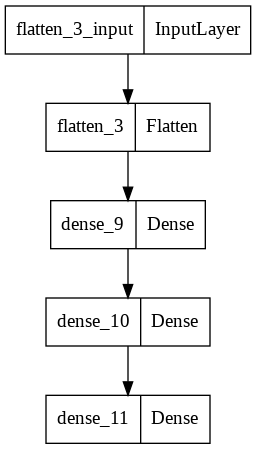

In [135]:
keras.utils.plot_model(model)

In [136]:
weights, biases = model.layers[1].get_weights()

In [137]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [138]:
weights.shape

(784, 300)

In [139]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [140]:
biases.shape

(300,)

processos de aprendizagem

In [141]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

# scc = para dados categóricos
# sgd = descida de gradiente estocástica
# para rótulos binários = binary_cross_entropy

In [143]:
print("Fashion MNIST treinamento -  rows:",x_train.shape[0]," columns:", x_train.shape[1:4])
print("Fashion MNIST validação -  rows:",x_valid.shape[0]," columns:", x_valid.shape[1:4])
print("Fashion MNIST teste -  rows:",x_test.shape[0]," columns:", x_test.shape[1:4])

Fashion MNIST treinamento -  rows: 55000  columns: (28, 28)
Fashion MNIST validação -  rows: 5000  columns: (28, 28)
Fashion MNIST teste -  rows: 10000  columns: (28, 28)


Executamos o modelo com o conjunto de treinamento. Também estamos usando o conjunto de validação (um subconjunto do conjunto de treinamento original) para validação.

In [142]:
model_history = model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))
# por padrão epochs = 1

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4353 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4391 - accuracy: 0.8457 - val_loss: 0.5333 - val_accuracy: 0.7988
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4123 - accuracy: 0.8564 - val_loss: 0.3916 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3939 - accuracy: 0.8616 - val_loss: 0.3741 - val_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3751 - accuracy: 0.8678 - val_loss: 0.3706 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3630 - accuracy: 0.8715 - val_loss: 0.3621 - val_accuracy:

In [144]:
model_history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [145]:
model_history.history

{'accuracy': [0.7643091082572937,
  0.831781804561615,
  0.8456545472145081,
  0.8563636541366577,
  0.8616363406181335,
  0.8677818179130554,
  0.8715272545814514,
  0.8752181529998779,
  0.8791999816894531,
  0.8822181820869446,
  0.8838000297546387,
  0.8866727352142334,
  0.8893818259239197,
  0.8915091156959534,
  0.8938363790512085,
  0.8969636559486389,
  0.8981454372406006,
  0.9000727534294128,
  0.902472734451294,
  0.9037272930145264,
  0.9059090614318848,
  0.9075272679328918,
  0.9083636403083801,
  0.9100000262260437,
  0.9124181866645813,
  0.9137272834777832,
  0.9154909253120422,
  0.9166363477706909,
  0.9188545346260071,
  0.9198727011680603],
 'loss': [0.7237027883529663,
  0.484192818403244,
  0.4390534460544586,
  0.41231462359428406,
  0.3939222991466522,
  0.3750678300857544,
  0.3630312979221344,
  0.35152509808540344,
  0.3412765860557556,
  0.3317754566669464,
  0.3238329291343689,
  0.3146835267543793,
  0.30778029561042786,
  0.30192798376083374,
  0.294391

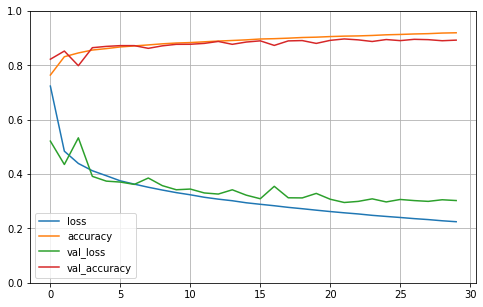

In [146]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Avaliamos a precisão do modelo com base nos valores previstos para o conjunto de teste. Vamos verificar o valor de validação durante o treinamento.

In [147]:
# Calculamos a perda e a precisão do teste
score = model.evaluate(x_test,y_test, verbose=0)
print('Teste loss:', score[0])
print('Teste accuracy:', score[1])

Teste loss: 0.3366333842277527
Teste accuracy: 0.8820000290870667


In [148]:
# model = keras.models.Sequential() # USANDO API SEQUENCIAL
# model.add(keras.layers.Flatten(input_shape=[28,28])) # camada de entrada, convertendo 2D para 28*28 pixels usando flatten
# model.add(keras.layers.Dense(300,activation="relu")) # 1ª camada oculta, 300=não de neurônios, relu = função de ativação
# model.add(keras.layers.Dense(100,activation="relu")) # 2ª camada oculta
# model.add(keras.layers.Dense(10,activation="softmax")) # camada de saída, categorias=10
# # relu = 0 para todos os números negativos ou relu = saída para os números positivos

**Retreinar o modelo**

In [160]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
# Model
mode_2 = Sequential()
# Add convolution 2D
mode_2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
mode_2.add(MaxPooling2D((2, 2)))
# Add dropouts to the mode_2
mode_2.add(Dropout(0.25))
mode_2.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
mode_2.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the mode_2
mode_2.add(Dropout(0.25))
mode_2.add(Conv2D(128, (3, 3), activation='relu'))
# Add dropouts to the mode_2
mode_2.add(Dropout(0.4))
mode_2.add(Flatten())
mode_2.add(Dense(128, activation='relu'))
# Add dropouts to the mode_2
mode_2.add(Dropout(0.3))
mode_2.add(Dense(10, activation='softmax'))

# mode_2.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
mode_2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

Vamos inspecionar primeiro o modelo.

In [161]:
mode_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 3, 3, 128)         7

In [166]:
# from keras.utils import plot_model
# from IPython.display import SVG
# keras.utils.plot_model(mode_2)
# plot_model(mode_2, to_file='model.png')
# SVG(model_to_dot(mode_2).create(prog='dot', format='svg'))

# Avaliando o desempenho e prevendo

In [109]:
# Calculamos a perda e a precisão do teste
score = model.evaluate(x_test,y_test, verbose=0)
print('Teste loss:', score[0])
print('Teste accuracy:', score[1])

Teste loss: 0.3366333842277527
Teste accuracy: 0.8820000290870667


In [88]:
x_new = x_test[:] # considerando as três primeiras amostras do conjunto de dados de teste

In [89]:
y_proba = model.predict(x_new) # probabilidade para cada classe
y_proba.round(2)

array([[0.  , 0.  , 0.  , ..., 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.01, 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [90]:
y_pred = np.argmax(model.predict(x_new), axis=-1)
y_pred
# categoria começa de 0 a 9
# primeira categoria de registro = 9 que pode ser confirmado pelas probabilidades acima
# categoria da segunda amostra = 2
# categoria da terceira amostra = 1

array([9, 2, 1, ..., 8, 1, 5])

In [91]:
pred_names = np.array(class_names)[y_pred]
pred_names

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44) Pullover


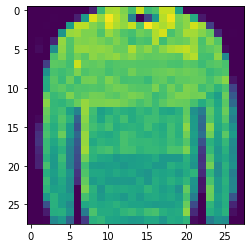

In [92]:
print(plt.imshow(x_test[20]))
print(plt.imshow(x_test[20]),pred_names[20])

AxesImage(54,36;334.8x217.44)


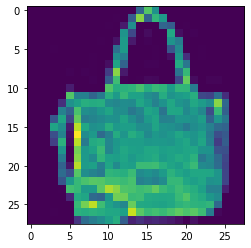

In [93]:
print(plt.imshow(x_test[2000]))

AxesImage(54,36;334.8x217.44)


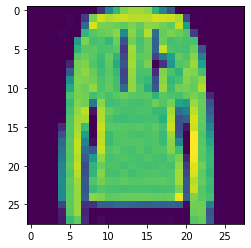

In [94]:
print(plt.imshow(x_test[525]))

In [95]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [96]:
y_pred = model.predict(x_new)
print(y_pred)

[[3.3825695e-06 3.8628036e-07 6.5566477e-05 ... 2.7664371e-02
  7.0207153e-04 9.6174222e-01]
 [1.1373546e-05 2.5406990e-08 9.8671442e-01 ... 6.6119410e-12
  6.9021184e-09 1.6687219e-11]
 [2.0375967e-06 9.9999738e-01 1.6198864e-08 ... 2.0313344e-13
  8.6761691e-09 1.2582500e-12]
 ...
 [1.1833573e-02 8.4372056e-07 6.8143854e-04 ... 4.1039252e-06
  9.8639536e-01 6.6005024e-09]
 [5.6129288e-06 9.9992752e-01 4.8479751e-07 ... 2.6506831e-11
  2.1855682e-07 5.2459939e-08]
 [3.2565364e-05 3.7191146e-06 2.4438350e-04 ... 4.6222587e-03
  1.4940049e-03 8.1663522e-05]]
